OpenCV-Python SIFT

https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

![nn](./sift_a.png)
![nn](./sift_b.png)

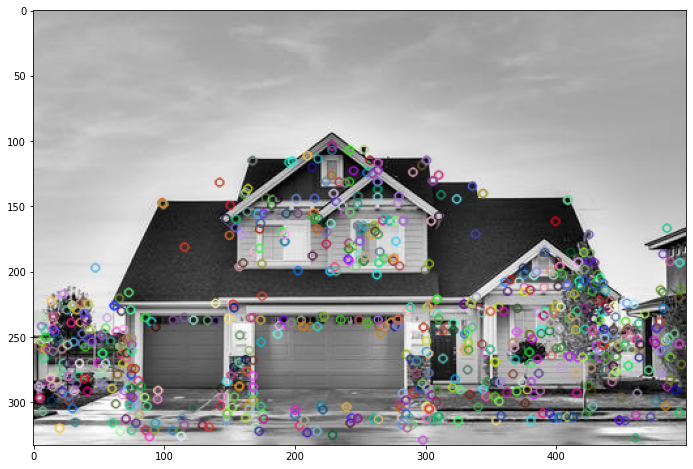

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../data/house.jpeg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img= cv.drawKeypoints(gray, kp, img)

plt.figure(figsize=(15,8))
plt.imshow(img)

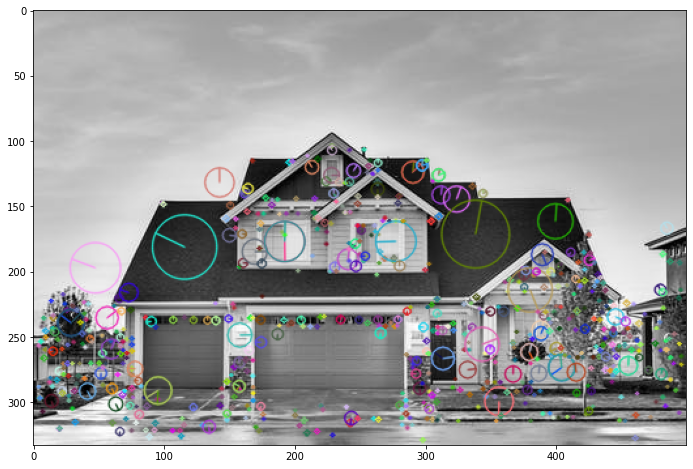

In [3]:
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv.imwrite('sift_keypoints.jpg',img)
plt.figure(figsize=(15,8))
plt.imshow(img)

In [5]:
sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)


print("angle: {:.2f} \n octave: {:.2f} \n coordinates: ({:.2f} {:.2f}) \n response: {:.2f} \n size: {:.2f} \n".format(kp[0].angle, kp[0].octave, kp[0].pt[0], kp[0].pt[1], kp[0].response, kp[0].size))

kp = np.array([i.pt for i in kp])
print(kp.shape)
print(des.shape)

angle: 357.10 
 octave: 2294271.00 
 coordinates: (3.84 287.84) 
 response: 0.07 
 size: 1.85 

(740, 2)
(740, 128)


# Using Kornia library


In [6]:
import torch
import kornia
import kornia.feature as KF
from torchvision import transforms
from PIL import Image

filename = '../data/house.jpeg'

tensor = transforms.ToTensor()(Image.open(filename).convert('L')).unsqueeze(0)

print(tensor.shape)

torch.Size([1, 1, 333, 500])


### DoG detector + (root) SIFT descriptor

 https://kornia.readthedocs.io/en/latest/feature.html?highlight=sift#kornia.feature.SIFTFeature

In [11]:
sift = KF.SIFTFeature(num_features=2000)

print(sift)

local_affine, confidence_score, descriptor = sift(tensor)

print(local_affine.shape, confidence_score.shape, descriptor.shape)

SIFTFeature(
  (detector): ScaleSpaceDetector(num_features=2000, mr_size=6.0, scale_pyr=ScalePyramid(n_levels=3, init_sigma=1.6, min_size=32, extra_levels=3, border=15, sigma_step=1.2599210498948732, double_image=True), resp=BlobDoG, nms=ConvQuadInterp3d(strict_maxima_bonus=10), ori=LAFOrienter(patch_size=19, angle_detector=PatchDominantGradientOrientation(patch_size=19, num_ang_bins=36, eps=1e-08)), aff=PassLAF())
  (descriptor): LAFDescriptor(descriptor=SIFTDescriptor(num_ang_bins=8, num_spatial_bins=4, patch_size=41, rootsift=True, clipval=0.2), patch_size=41, grayscale_descriptor=True)
)
torch.Size([1, 2000, 2, 3]) torch.Size([1, 2000]) torch.Size([1, 2000, 128])


###  SIFT descriptor only ( using patch input)

https://kornia.readthedocs.io/en/latest/feature.html?highlight=sift#kornia.feature.SIFTDescriptor

In [13]:
input = torch.rand(23, 1, 32, 32)
SIFT = KF.SIFTDescriptor(32, 8, 4)
descs = SIFT(input) # 23x128

print(descs.shape)

torch.Size([23, 128])


### Dense SIFT descriptor! (Without keypoint detection)

https://kornia.readthedocs.io/en/latest/feature.html#kornia.feature.DenseSIFTDescriptor

In [14]:
input =  torch.rand(2, 1, 200, 300)
SIFT = KF.DenseSIFTDescriptor()
descs = SIFT(input) # 2x128x194x294

AttributeError: module 'kornia.feature' has no attribute 'DenseSIFTDescriptor'